In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping

In [18]:
plt.style.use('seaborn-v0_8')

In [19]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 768
Total features: 9


/tmp/ipython-input-4210084904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_diabetes['age'])


<Axes: xlabel='age', ylabel='Density'>

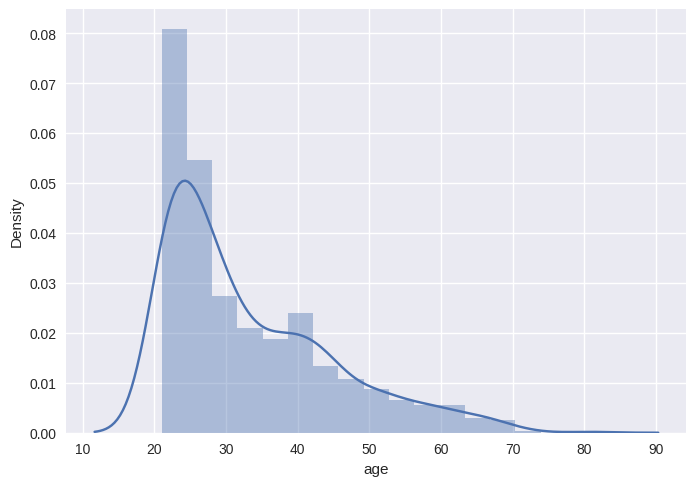

In [21]:
sns.distplot(df_diabetes['age'])

In [22]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
# ======================
# Kolom yang tidak logis bernilai 0 → ganti dengan median
cols_with_zero = ['glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI']
for col in cols_with_zero:
    df_diabetes[col] = df_diabetes[col].replace(0, np.nan)
    df_diabetes[col].fillna(df_diabetes[col].median(), inplace=True)

/tmp/ipython-input-1216325952.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diabetes[col].fillna(df_diabetes[col].median(), inplace=True)


In [24]:
features = df_diabetes.values[:,:8]

In [25]:
labels = df_diabetes.values[:,8:]

In [26]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=20
)

In [27]:
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train.ravel())
class_weights = dict(zip(classes, class_weights))
print("Class Weights:", class_weights)

Class Weights: {np.float64(0.0): np.float64(0.7694235588972431), np.float64(1.0): np.float64(1.427906976744186)}


In [28]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dropout(0.05))        # dropout lebih kecil
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
optimizer = Nadam(learning_rate=0.0003)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=64,            # lebih kecil agar lebih detail
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7897 - loss: 0.4437 - val_accuracy: 0.6829 - val_loss: 0.5910
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7698 - loss: 0.4281 - val_accuracy: 0.6829 - val_loss: 0.5916
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7938 - loss: 0.4321 - val_accuracy: 0.6829 - val_loss: 0.5952
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7926 - loss: 0.4286 - val_accuracy: 0.6829 - val_loss: 0.5957
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.7917 - loss: 0.4413 - val_accuracy: 0.6748 - val_loss: 0.5968
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7788 - loss: 0.4460 - val_accuracy: 0.6829 - val_loss: 0.5887
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8078 - loss: 0.4334 - val_accuracy: 0.6829 - val_loss: 0.5827
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7830 - loss: 0.4487 - val_accuracy: 0.6829 - val_loss:

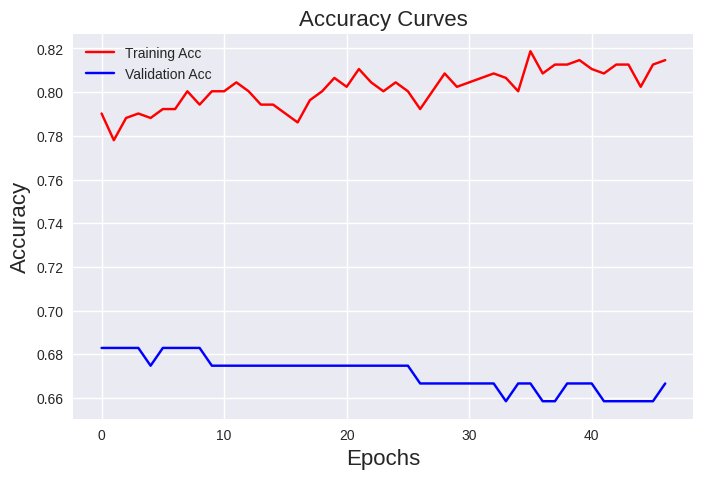

In [37]:
plt.figure(figsize=[8, 5])
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend(['Training Acc', 'Validation Acc'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

In [38]:
_, accuracy = model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 77.27%
